### Здесь все базовые понятия с помощью librosa и математики, есть графики, спектрограммы, скорее всего это пойдет в презентацию, для получения и изучения каждого признака аудио, идите в AnalisbyARS44PRO.ipynb, там я все расписал

In [9]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [10]:
audio_path = "C:/Users/денис/Desktop/AIChallenge/data/train/ffbd950f-341c-4798-a5cf-2e465c59c48b.mp3"

In [11]:
ipd.Audio(audio_path)

In [12]:
audio, sr = librosa.load(audio_path, sr=22050)

In [13]:
FRAME_SIZE = 256
HOP_LENGTH = 64

def amplitude_envelope(signal, frame_size, hop_length):
    return np.array([max(signal[i:i+frame_size]) for i in range(0, signal.size, hop_length)])

In [14]:
ae_audio = amplitude_envelope(audio, FRAME_SIZE, HOP_LENGTH)
rms_audio = librosa.feature.rms(y=audio, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_audio = librosa.feature.zero_crossing_rate(y=audio, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
ft = sp.fft.fft(audio)
magnitude = np.absolute(ft)
frequency = np.linspace(0, sr, len(magnitude))

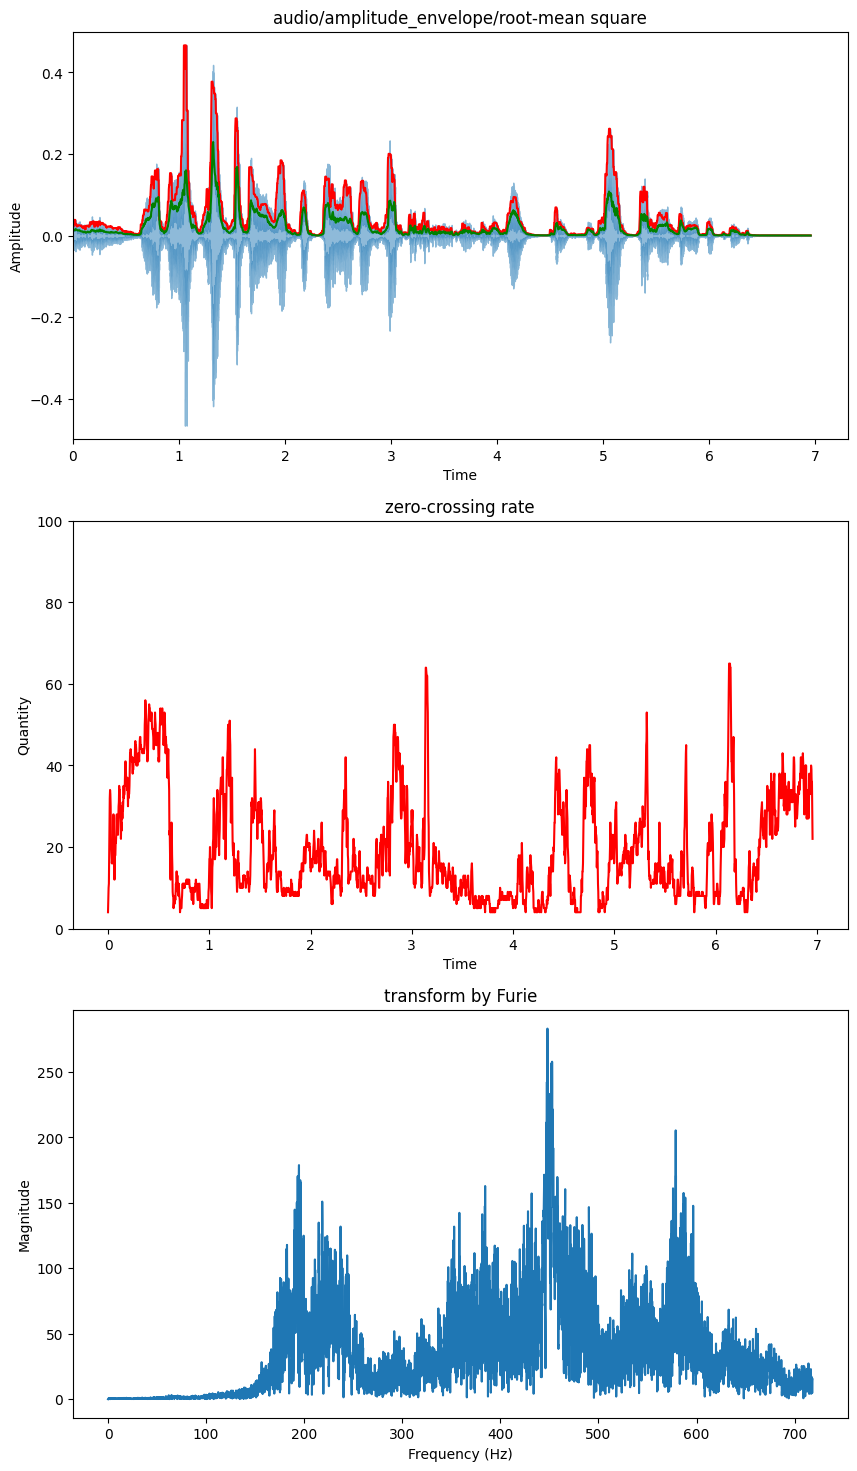

In [15]:
frames = range(0, ae_audio.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.figure(figsize=(10, 18))
plt.subplot(3, 1, 1)
librosa.display.waveshow(audio, sr=sr, alpha=0.5)
plt.plot(t, ae_audio, color="r")
plt.plot(t, rms_audio, color="g")
plt.title('audio/amplitude_envelope/root-mean square')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.ylim((-0.5, 0.5))
plt.xlim((0))

plt.subplot(3, 1, 2)
plt.plot(t, zcr_audio*FRAME_SIZE, color="r")
plt.ylim((0, 100))
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.title('zero-crossing rate')

plt.subplot(3, 1, 3)
plt.plot(frequency[:5000], magnitude[:5000])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title('transform by Furie')
plt.show()

In [16]:
FRAME_SIZE_FFT = 512
HOP_SIZE_FFT = 128
S_scale = librosa.stft(audio, n_fft=FRAME_SIZE_FFT, hop_length=HOP_SIZE_FFT)
Y_scale = np.abs(S_scale)**2
Y_log_scale = librosa.power_to_db(Y_scale)
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y, sr=sr, hop_length=hop_length, x_axis="time", y_axis=y_axis)
    plt.colorbar(format="%+2.f")

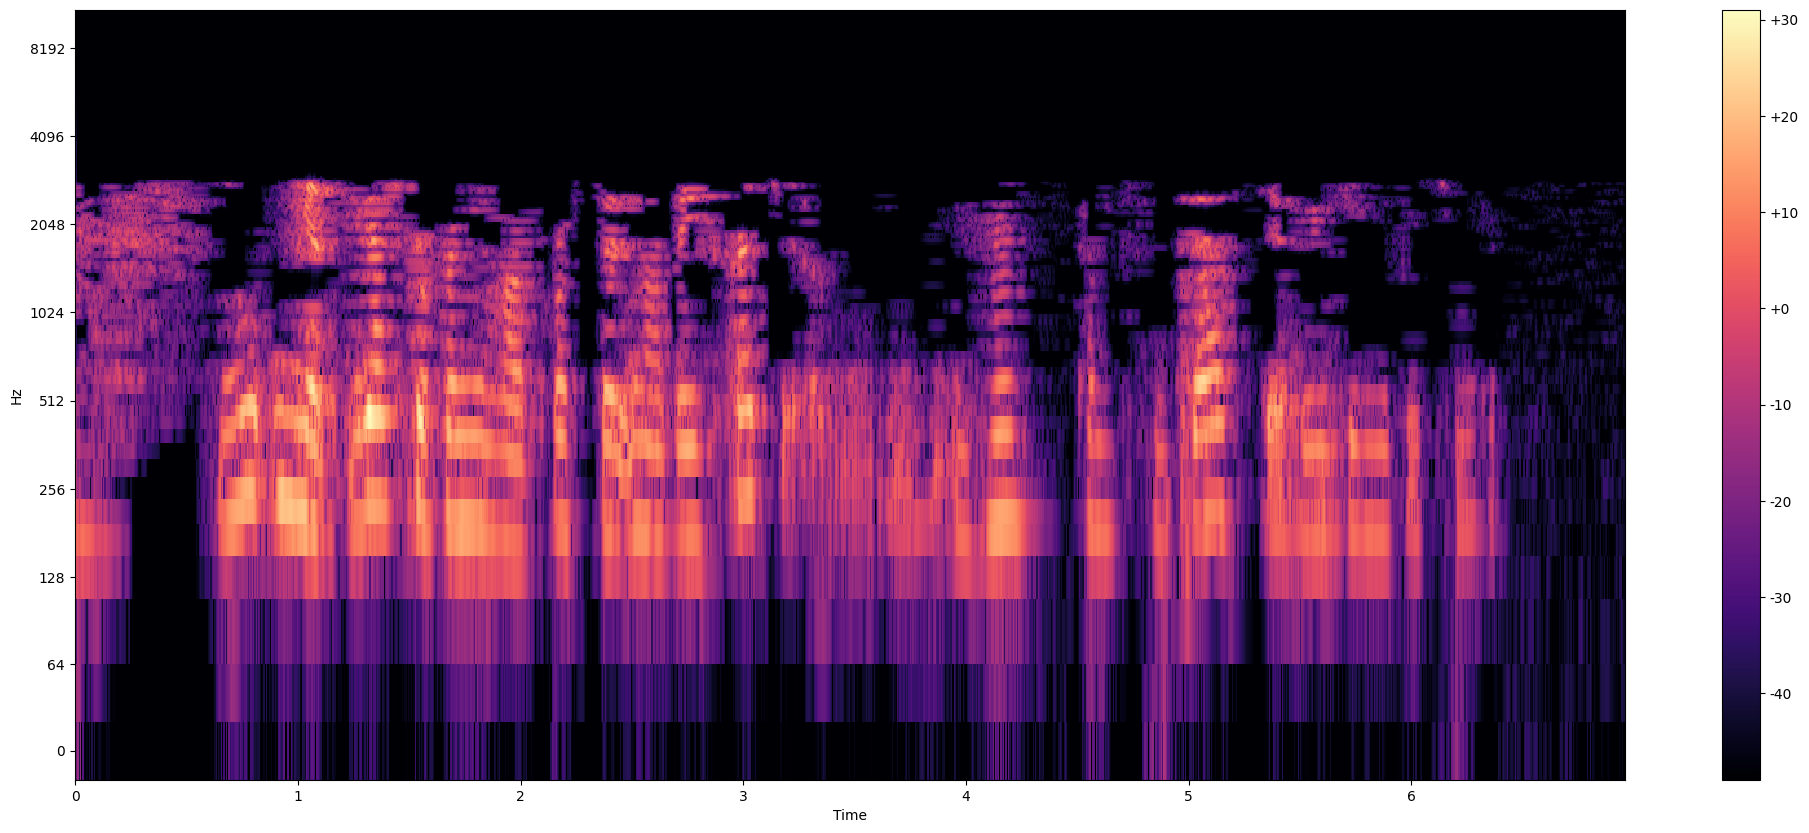

In [17]:
plot_spectrogram(Y_log_scale, sr, HOP_SIZE_FFT, y_axis="log")

In [18]:
filter_banks = librosa.filters.mel(n_fft=2048, sr=sr, n_mels=10)

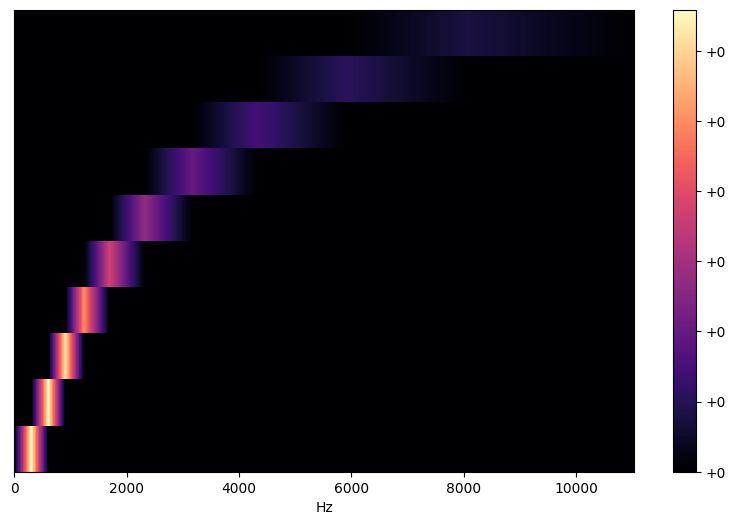

In [19]:
plt.figure(figsize=(10, 6))
librosa.display.specshow(filter_banks, sr=sr, x_axis="linear")
plt.colorbar(format="%+2.f")
plt.show()

In [20]:
mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=2048, hop_length=512, n_mels=90)

In [21]:
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

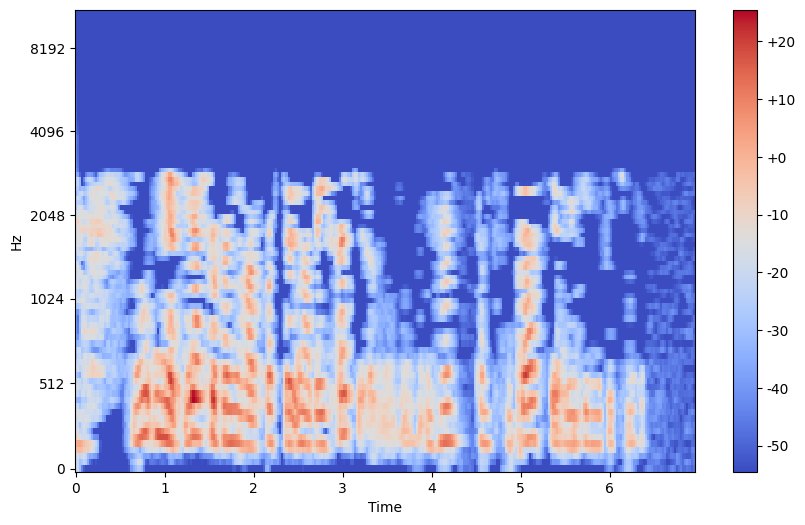

In [22]:
plt.figure(figsize=(10, 6))
librosa.display.specshow(log_mel_spectrogram, x_axis="time", y_axis="mel", sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

In [23]:
mfccs = librosa.feature.mfcc(y=audio, n_mfcc=13, sr=sr)

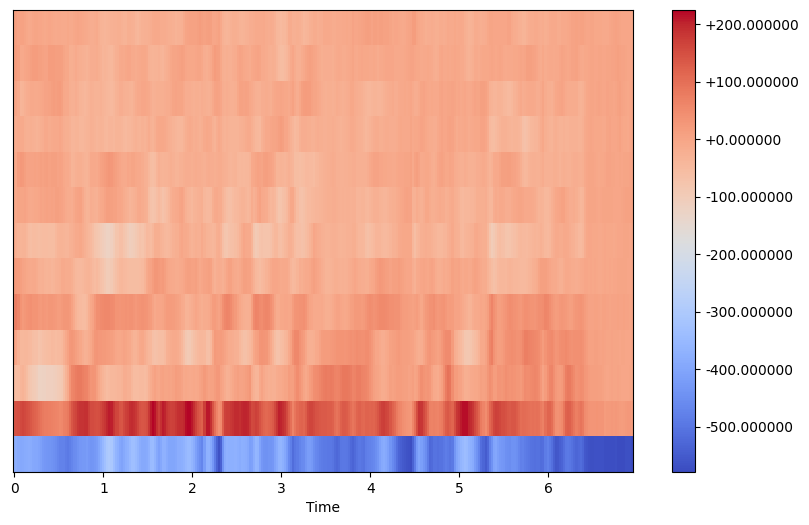

In [24]:
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfccs, x_axis="time", sr=sr)
plt.colorbar(format="%+2f")

In [25]:
delta_mfccs = librosa.feature.delta(mfccs)
delta2_mfcc = librosa.feature.delta(mfccs, order=2)

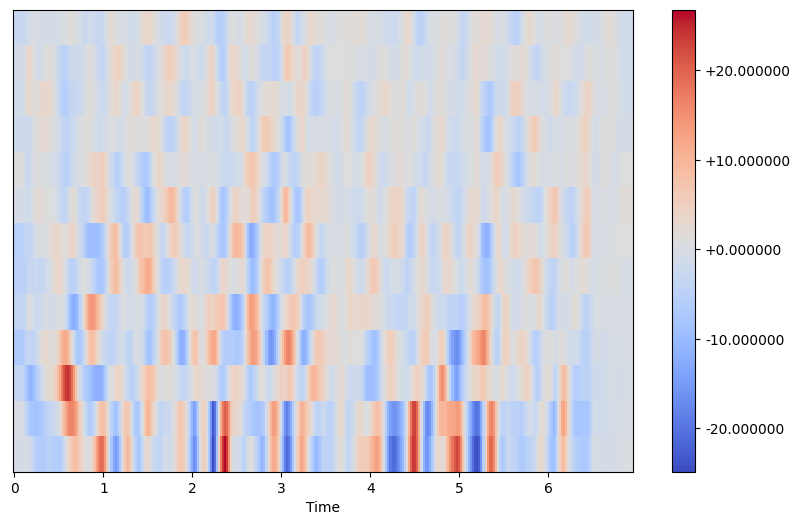

In [26]:
plt.figure(figsize=(10, 6))
librosa.display.specshow(delta_mfccs, x_axis="time", sr=sr)
plt.colorbar(format="%+2f")

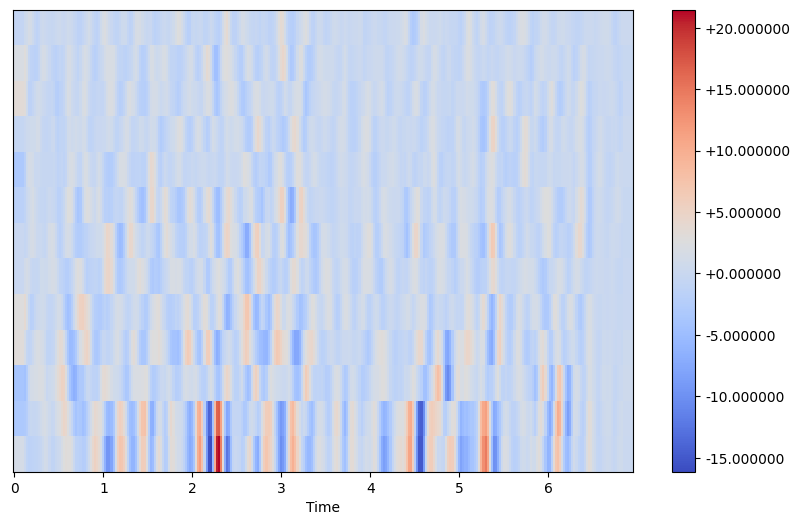

In [27]:
plt.figure(figsize=(10, 6))
librosa.display.specshow(delta2_mfcc, x_axis="time", sr=sr)
plt.colorbar(format="%+2f")

In [28]:
com_mfccs = np.concatenate((mfccs, delta_mfccs, delta2_mfcc))

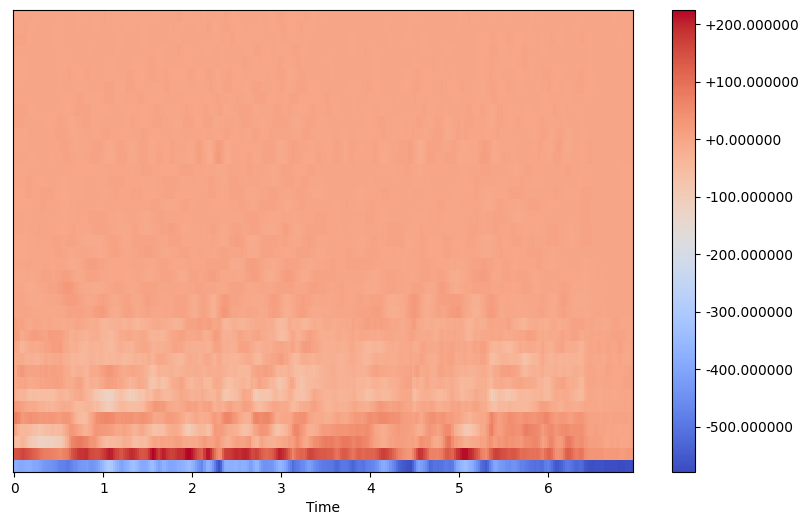

In [29]:
plt.figure(figsize=(10, 6))
librosa.display.specshow(com_mfccs, x_axis="time", sr=sr)
plt.colorbar(format="%+2f")